# Graph Representation
## 1/ Create Simple Graphs with Adjacency Matrix


## 1.1/ Install the necessary python libraries

In [9]:
!pip install networkx pandas numpy matplotlib

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


## 1.2/ A simple python class to store a graph structure as an adjacency matrix.

In [7]:
import networkx as nx
import numpy as np
import pandas as pd

class Graph(object):

    # Initialize the matrix
    # params:
    # size: the total nodes in the graph
    # directed: the graph will be a directed graph if True. Otherwise this is the undirected
    def __init__(self, size, directed=False):
        self.adjMatrix = []
        self.directed = directed
        
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2, weight=1):
        self.adjMatrix[v1][v2] = weight
        if not self.directed:
            self.adjMatrix[v2][v1] = weight

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            row_line = '\t'.join(map(str, row))
            print(f'{row_line}')



## 1.3/ Create an undirected graph and print its Adjacency Matrix

0	0	1	0	1
0	0	1	1	0
1	1	0	1	0
0	1	1	0	1
1	0	0	1	0


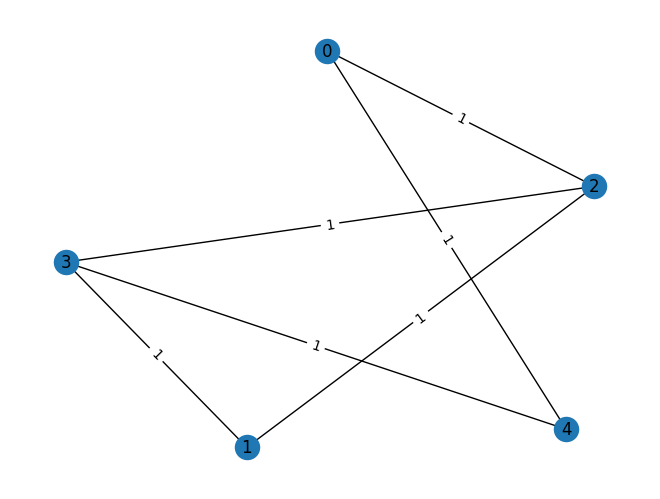

In [10]:
# Draw the graph
def show_graph(adjacency_matrix, directed=False):
    rows = []
    cols = []
    values = []
    for i in range(len(adjacency_matrix)):
        for j, value in enumerate(adjacency_matrix[i]):
            if value != 0:
                rows.append(i)
                cols.append(j)
                values.append(value)
                
    edges = zip(rows, cols, values)
    if directed:
        gr = nx.DiGraph()
    else:
        gr = nx.Graph()
    gr.add_weighted_edges_from(edges)
    
    pos = nx.spring_layout(gr, k=10)  # For better example looking
    nx.draw(gr, pos, with_labels=True)
    labels = nx.get_edge_attributes(gr,'weight')
    nx.draw_networkx_edge_labels(gr, pos, edge_labels=labels)

    plt.show()

    
def main():
    # Initialize the graph
    g = Graph(5)
    # Add edges 
    g.add_edge(0, 2)
    g.add_edge(0, 4)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(2, 0)
    g.add_edge(2, 3)
    g.add_edge(3, 4)

    g.print_matrix()
    
    show_graph(g.adjMatrix)


if __name__ == '__main__':
    main()

## 1.4/ Create an directed graph and print its Adjacency Matrix

0	0	1	0	1
0	0	1	1	0
1	0	0	1	0
0	0	0	0	1
0	0	0	0	0


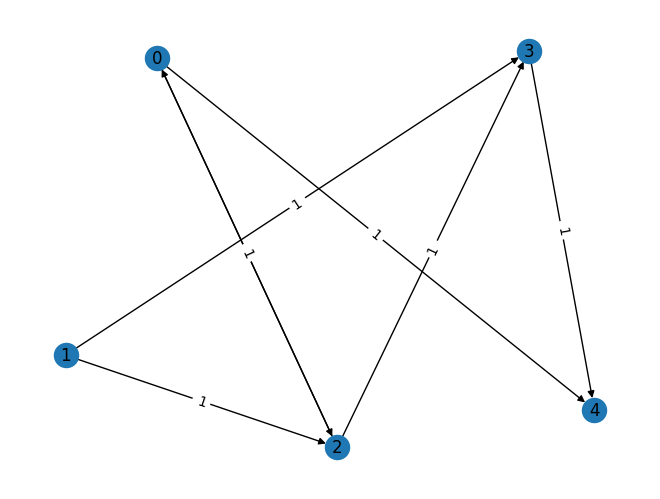

In [11]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2)
    g.add_edge(0, 4)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(2, 0)
    g.add_edge(2, 3)
    g.add_edge(3, 4)

    g.print_matrix()
    show_graph(g.adjMatrix, directed=True)


if __name__ == '__main__':
    main()

## 1.5/ Create a weighted graph and print its Adjacency Matrix

In [12]:
def main():
    g = Graph(5)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)

    g.print_matrix()


if __name__ == '__main__':
    main()

0	0	0.5	0	1
0	0	2.0	1	0
0.5	2.0	0	3.0	0
0	1	3.0	0	2.5
1	0	0	2.5	0


## 1.6/ Create a function to print all out edges of a node

In [22]:
def print_out_edges(self, v):
    if v > self.size - 1:
        print(f"Not found the vertex {v}")
        return
    print(f"List of out-edges of node {v}: ")
    for index, value in enumerate(self.adjMatrix[v]):
        if value != 0:
            print(f"{v} --{value}--> {index}")
        
        
setattr(Graph, "print_out_edges", print_out_edges)

List of out-edges of node 0: 
0 --0.5--> 2
0 --1--> 4


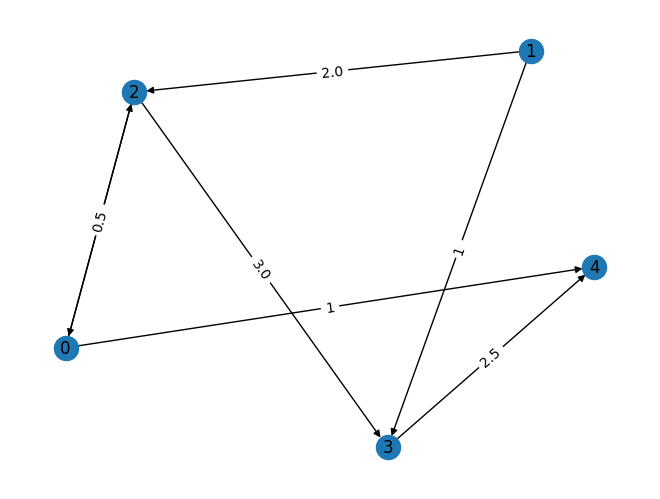

In [14]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)

    g.print_out_edges(0)
    
    show_graph(g.adjMatrix, directed=True)


if __name__ == '__main__':
    main()

## 1.7/ Create a function to print all in edges of a node

In [21]:
def print_in_edges(self, v):
    if v > self.size - 1:
        print(f"Not found the vertex {v}")
        return
    print(f"List of in-edges of node {v}: ")
    for index, value in enumerate(self.adjMatrix):
        if value[v] != 0:
            print(f"{index} --{value[v]}--> {v}")
        
        
setattr(Graph, "print_in_edges", print_in_edges)

List of in-edges of node 0: 
2 --0.5--> 0
List of in-edges of node 2: 
0 --0.5--> 2
1 --2.0--> 2


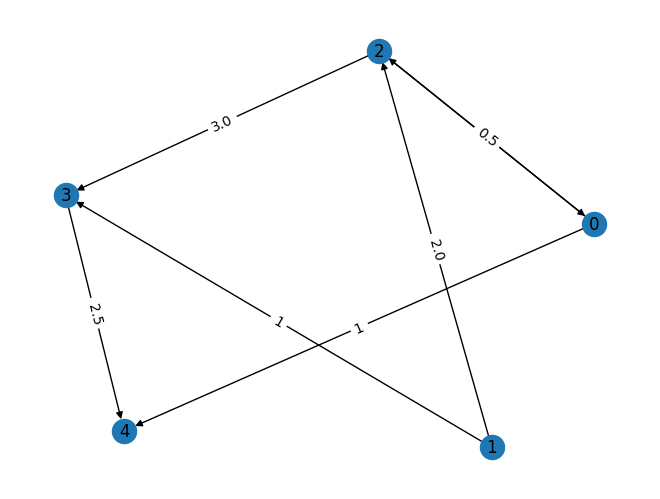

In [16]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)
    
    g.print_in_edges(0)

    g.print_in_edges(2)
    
    show_graph(g.adjMatrix, directed=True)


if __name__ == '__main__':
    main()

## 1.8/ Get weight of an edge

In [17]:
def get_edge_weight(self, v1, v2):
    if v1 > self.size - 1 or v2 > self.size - 1:
        print(f"Not found {v1} or {v2}!")
        return 0
    return self.adjMatrix[v1][v2]
        
        
setattr(Graph, "get_edge_weight", get_edge_weight)

In [18]:
def main():
    g = Graph(5)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)

    print(f"Weight of an edge 1 -> 2: {g.get_edge_weight(1, 2)}")

if __name__ == '__main__':
    main()

Weight of an edge 1 -> 2: 2.0


## 1.9/ Print Adjacency Lists in the graph
### 1.9.1/ For directed graph

In [24]:
def print_all_edges(self):
    print("The Adjacency lists: ")
    for i, row in enumerate(self.adjMatrix):
        print("Node (" + str(i) + "): ", end="")
        for j, value in enumerate(row):
            if value != 0:
                print(f" -- {value} --> ({j})", end="")
        print("\n")
        
        
setattr(Graph, "print_all_edges", print_all_edges)

In [25]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)

    g.print_all_edges()


if __name__ == '__main__':
    main()

The Adjacency lists: 
Node (0):  -- 0.5 --> (2) -- 1 --> (4)

Node (1):  -- 2.0 --> (2) -- 1 --> (3)

Node (2): 

Node (3): 

Node (4): 



### 1.9.2/ For undirected graph

In [26]:
def main():
    g = Graph(5, directed=False)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)

    g.print_all_edges()


if __name__ == '__main__':
    main()

The Adjacency lists: 
Node (0):  -- 0.5 --> (2) -- 1 --> (4)

Node (1):  -- 2.0 --> (2) -- 1 --> (3)

Node (2):  -- 0.5 --> (0) -- 2.0 --> (1)

Node (3):  -- 1 --> (1)

Node (4):  -- 1 --> (0)



## 1.10/ Create Simple Graphs with Adjacency List

In [27]:
class AdjNode:
    def __init__(self, vertex, weight=1):
        self.vertex = vertex
        self.weight = weight
        self.next = None

def show_list(vertex):
    if vertex != None:
        show_list(vertex.next)
        print(" -- {} --> ({})".format(vertex.weight,vertex.vertex), end="")
        

class GraphAdjList:
    def __init__(self, num_nodes):
        self.V = num_nodes
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, sourse_v, target_v, weight=1):
        node = AdjNode(target_v, weight)
        node.next = self.graph[sourse_v]
        self.graph[sourse_v] = node
        
        node = AdjNode(sourse_v, weight)
        node.next = self.graph[target_v]
        self.graph[target_v] = node
        

    # Print the graph
    def print_graph(self):
        for i in range(self.V):
            print("The Adjacency lists: ")
            print("Node (" + str(i) + "): ", end="")
            temp = self.graph[i]
            show_list(temp)
            print(" \n")


In [28]:
if __name__ == "__main__":
    num_nodes = 5

    # Create undirected graph and edges
    g = GraphAdjList(num_nodes)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)

    g.print_graph()

The Adjacency lists: 
Node (0):  -- 0.5 --> (2) -- 1 --> (4) 

The Adjacency lists: 
Node (1):  -- 2.0 --> (2) -- 1 --> (3) 

The Adjacency lists: 
Node (2):  -- 0.5 --> (0) -- 2.0 --> (1) 

The Adjacency lists: 
Node (3):  -- 1 --> (1) 

The Adjacency lists: 
Node (4):  -- 1 --> (0) 



# Networkx
## 1/ Generate the adjacency matrix from a graph
### 1.1/ Sparse matrix


In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Instantiate the graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

A = nx.adjacency_matrix(G)
print(A)


  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (3, 0)	1
  (3, 1)	1
  (3, 6)	1
  (4, 0)	1
  (4, 6)	1
  (4, 8)	1
  (5, 1)	1
  (6, 3)	1
  (6, 4)	1
  (6, 7)	1
  (7, 6)	1
  (8, 4)	1
  (8, 9)	1
  (9, 8)	1


### 1.2/ Adjacency list

In [33]:
adjacency_list = nx.generate_adjlist(G)
for line in adjacency_list:
    print(line)

0 1 2 3 5
1 3 6
2
3 4
5 4 8
6
4 7
7
8 9
9


### 1.3/ Dense matrix

In [34]:
A = nx.adjacency_matrix(G)
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]]


,0,1,2,3,5,6,4,7,8,9
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2/ Calculate the number of IN-edges, OUT-edges, add edge and remove edge.

In [35]:
# Instantiate the graph
G = nx.DiGraph()
# add node/edge pairs
G.add_edges_from([("A", "B"), ("B", "A"), ("C", "B"), ("C", "D")])

# Get a vertex’s out-edges:
print(f"OUT-edges of node B: {G.out_degree('B')}")
# Get a vertex’s in-edges: 
print(f"IN-edges of node B: {G.in_degree('B')}")
# Decide if some edge exists: 
print(f"Check an edge from A to C: {G.has_edge('A', 'C')}")
# Insert an edge:
G.add_edge("A", "C") 
# OR 
G.add_edges_from([("A", "D")])
print(f"Check an edge from A to C: {G.has_edge('A', 'C')}")
print(f"Check an edge from A to D: {G.has_edge('A', 'D')}")
# Delete an edge:
G.remove_edge("A", "C") 
# OR 
G.remove_edges_from([("A", "D")])
print(f"Check an edge from A to C: {G.has_edge('A', 'C')}")
print(f"Check an edge from A to D: {G.has_edge('A', 'D')}")

OUT-edges of node B: 1
IN-edges of node B: 2
Check an edge from A to C: False
Check an edge from A to C: True
Check an edge from A to D: True
Check an edge from A to C: False
Check an edge from A to D: False


In [36]:
# Instantiate the graph
G = nx.DiGraph()
# add node/edge pairs
G.add_edges_from([("A", "B"), ("B", "A"), ("C", "B"), ("C", "D")])
adjacency_list = nx.generate_adjlist(G)
for line in adjacency_list:
    print(line)

A B
B A
C B D
D


## 3/ Sparse and dense adjacency matrix of a directed graph

In [37]:
# Instantiate the graph
G = nx.DiGraph()
# add node/edge pairs
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])


A = nx.adjacency_matrix(G)
print("The sparse adjacency matrix: ")
print(A)

print("The dense adjacency matrix: ")
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

The sparse adjacency matrix: 
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 3)	1
  (1, 5)	1
  (3, 6)	1
  (4, 8)	1
  (6, 4)	1
  (6, 7)	1
  (8, 9)	1
The dense adjacency matrix: 
[[0 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


,0,1,2,3,5,6,4,7,8,9
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4/ Shortest path between 2 nodes

Shortest path from 0 -> 9: 
0->3->4->5->8->9


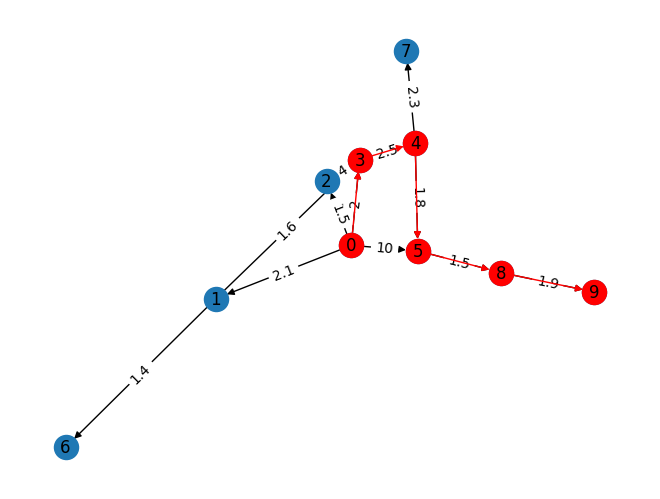

In [43]:
# Instantiate the graph
G = nx.DiGraph()

edges = [(0, 1, 2.1), (0, 2, 1.5), (0, 3, 2), (0, 5, 10), (1, 3, 1.6), (1, 6, 1.4), (2, 3, 4), (3, 4, 2.5), (4, 5, 1.8), (4, 7, 2.3), (5, 8, 1.5), (8, 9, 1.9)]
# add node/edge pairs
G.add_weighted_edges_from(edges)

# Pandas format
nx.to_pandas_adjacency(G)

pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
# draw path in red

source = 0
target = 9
path = nx.shortest_path(G,source=source,target=target, weight='weight', method="dijkstra")

print(f"Shortest path from {source} -> {target}: ")
print("->".join(map(str, path)))

path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r')

# Centrality Measures
## 1/ Calculating centrality measures in weighted graphs

- Construct a directed weighted graph G from Edge.csv and Nodes.csv

- Calculating centrality measures (Degree, Betweenness, Closeness, Katz, Eigenvector, Pagerank)


In [23]:
# Import libraries
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline

### 1.1/ Loading Datasets:


In [24]:
#Read nodes and edges datasets
nodes = pd.read_csv('./data/Nodes.csv')
edges = pd.read_csv('./data/Edges.csv')

### 1.2/ Check nodes

In [25]:
nodes.head(5)

,id
0,1
1,2
2,3
3,4
4,5


### 1.3/ Check edges

In [26]:
edges.head()
edges.shape

(51, 3)

In [27]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to'])['weight'].sum().reset_index()
edges.head(5)

,from,to,weight
0,1,2,22
1,1,3,22
2,1,4,21
3,1,15,20
4,2,1,23


### 1.4/ Create directed graph using edgelist


In [28]:
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.Graph())

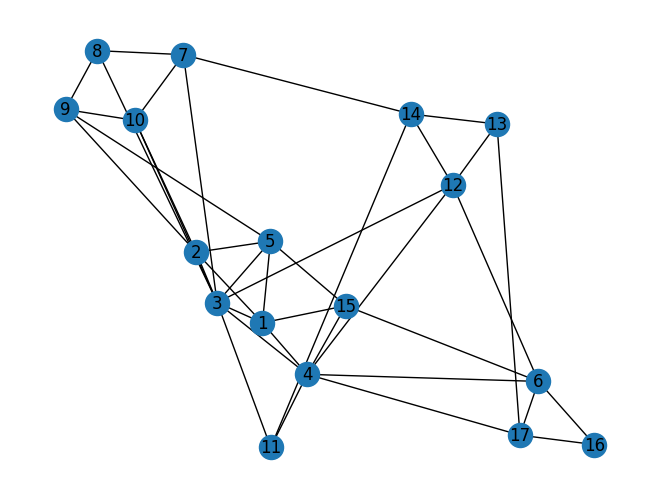

In [16]:
nx.draw(G,with_labels=True)
#nx.draw(G)

In [17]:
#Check edge data
G.edges.data()

EdgeDataView([(1, 2, {'weight': 23}), (1, 3, {'weight': 21}), (1, 4, {'weight': 21}), (1, 15, {'weight': 22}), (1, 5, {'weight': 1}), (2, 3, {'weight': 21}), (2, 9, {'weight': 1}), (2, 10, {'weight': 5}), (2, 5, {'weight': 21}), (3, 4, {'weight': 23}), (3, 5, {'weight': 1}), (3, 8, {'weight': 2}), (3, 10, {'weight': 2}), (3, 11, {'weight': 1}), (3, 12, {'weight': 1}), (3, 7, {'weight': 1}), (4, 6, {'weight': 1}), (4, 11, {'weight': 22}), (4, 12, {'weight': 3}), (4, 17, {'weight': 4}), (4, 15, {'weight': 1}), (15, 5, {'weight': 21}), (15, 6, {'weight': 4}), (9, 5, {'weight': 2}), (9, 8, {'weight': 23}), (9, 10, {'weight': 21}), (10, 7, {'weight': 21}), (8, 7, {'weight': 21}), (11, 14, {'weight': 1}), (12, 6, {'weight': 2}), (12, 13, {'weight': 21}), (12, 14, {'weight': 22}), (6, 16, {'weight': 23}), (6, 17, {'weight': 21}), (17, 13, {'weight': 1}), (17, 16, {'weight': 21}), (7, 14, {'weight': 4}), (14, 13, {'weight': 21})])

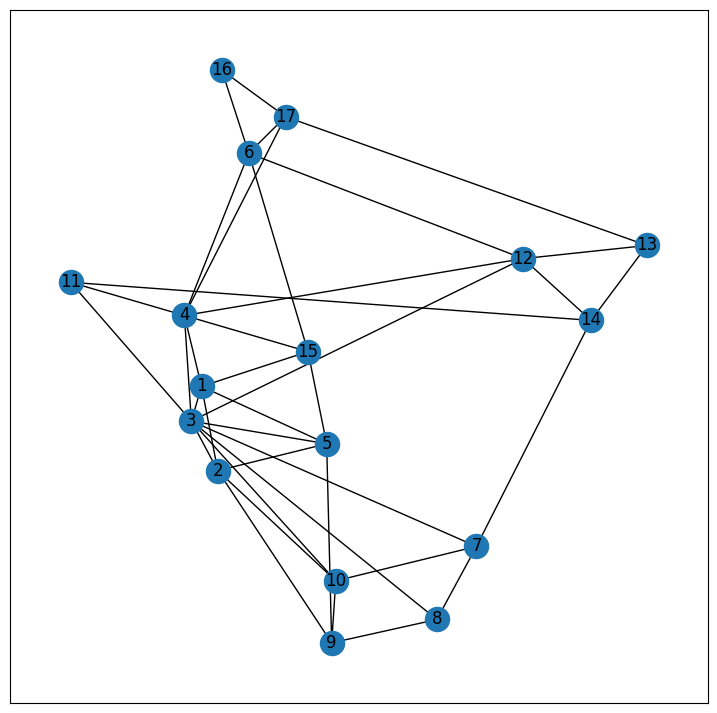

In [18]:
plt.figure(figsize=(9,9))
nx.draw_networkx(G)
plt.show()

### 2/ Network Centrality Measures

(array([1., 3., 6., 0., 5., 0., 0., 1., 0., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

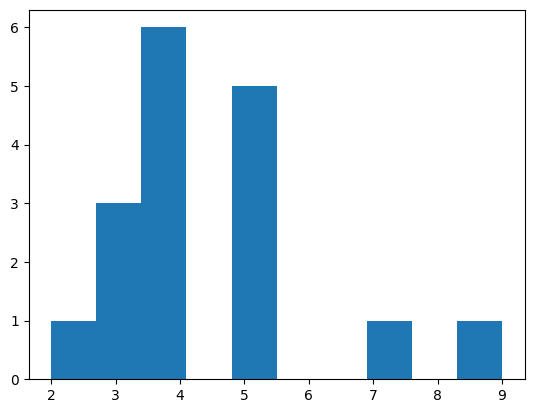

In [19]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n) for n in G.nodes()]

#degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

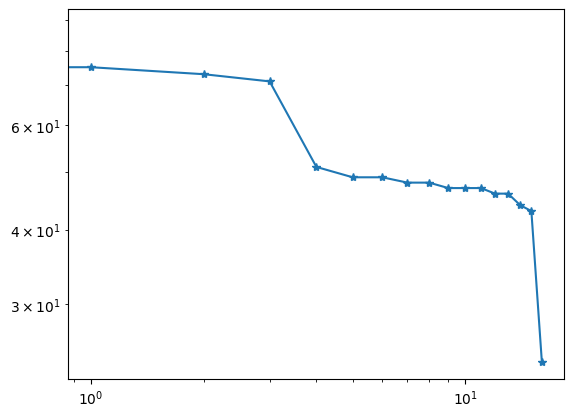

In [20]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [21]:
#Degree centrality for weighted graph
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())

degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]

degree_centrality_weighted

[1.0,
 0.8068181818181818,
 0.8295454545454546,
 0.8522727272727273,
 0.5454545454545454,
 0.5340909090909091,
 0.5568181818181818,
 0.5227272727272727,
 0.5227272727272727,
 0.2727272727272727,
 0.5568181818181818,
 0.5795454545454546,
 0.5340909090909091,
 0.5,
 0.5340909090909091,
 0.5454545454545454,
 0.48863636363636365]

In [22]:
nx.degree_centrality(G)

{1: 0.3125,
 2: 0.3125,
 3: 0.5625,
 4: 0.4375,
 15: 0.25,
 9: 0.25,
 10: 0.25,
 5: 0.3125,
 8: 0.1875,
 11: 0.1875,
 12: 0.3125,
 6: 0.3125,
 17: 0.25,
 16: 0.125,
 7: 0.25,
 14: 0.25,
 13: 0.1875}

### 3/ Closeness centrality

In [29]:
nx.closeness_centrality(G)

{1: 0.5333333333333333,
 2: 0.48484848484848486,
 3: 0.6666666666666666,
 4: 0.6153846153846154,
 15: 0.48484848484848486,
 9: 0.41025641025641024,
 10: 0.47058823529411764,
 5: 0.5161290322580645,
 8: 0.45714285714285713,
 11: 0.5161290322580645,
 12: 0.5714285714285714,
 6: 0.5,
 17: 0.45714285714285713,
 16: 0.35555555555555557,
 7: 0.48484848484848486,
 14: 0.47058823529411764,
 13: 0.43243243243243246}

In [30]:
nx.closeness_centrality(G, distance='weight')

{1: 0.16326530612244897,
 2: 0.13008130081300814,
 3: 0.21621621621621623,
 4: 0.16666666666666666,
 15: 0.14414414414414414,
 9: 0.14678899082568808,
 10: 0.1553398058252427,
 5: 0.1927710843373494,
 8: 0.15384615384615385,
 11: 0.1839080459770115,
 12: 0.2077922077922078,
 6: 0.1839080459770115,
 17: 0.11347517730496454,
 16: 0.03827751196172249,
 7: 0.1797752808988764,
 14: 0.1568627450980392,
 13: 0.10256410256410256}

### 4/ Betweenness centrality

In [31]:
nx.betweenness_centrality(G, weight='weight')

{1: 0.0,
 2: 0.0,
 3: 0.7583333333333333,
 4: 0.325,
 15: 0.0,
 9: 0.11666666666666667,
 10: 0.0,
 5: 0.3333333333333333,
 8: 0.0,
 11: 0.125,
 12: 0.5,
 6: 0.2916666666666667,
 17: 0.125,
 16: 0.0,
 7: 0.0,
 14: 0.0,
 13: 0.0}

In [32]:
#Sort for identifying most inflential nodes using betweenness centrality
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')

for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

3 0.7583333333333333
12 0.5
5 0.3333333333333333
4 0.325
6 0.2916666666666667
11 0.125
17 0.125
9 0.11666666666666667
1 0.0
2 0.0
15 0.0
10 0.0
8 0.0
16 0.0
7 0.0
14 0.0
13 0.0


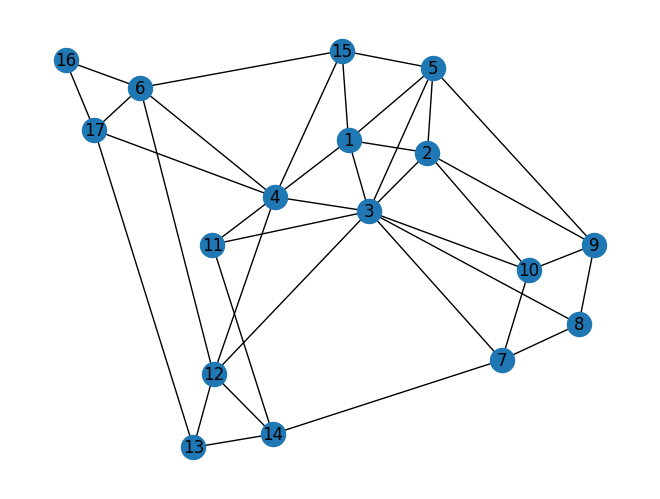

In [33]:
nx.draw(G, with_labels=True)

### 5/ Eigenvector Centrality

In [34]:
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{1: 0.5243879751840346,
 2: 0.4234266643002833,
 3: 0.4609728287014517,
 4: 0.3941573797305682,
 15: 0.26726633574782693,
 9: 0.06061597013618106,
 10: 0.08439577732499759,
 5: 0.242065790354225,
 8: 0.05344744462526894,
 11: 0.14206001915974797,
 12: 0.04535228494306331,
 6: 0.05556814065819854,
 17: 0.0552431826941605,
 16: 0.03780719548725359,
 7: 0.05384481797483081,
 14: 0.029198742490167552,
 13: 0.025133401245443665}

### 6/ PageRank Centrality

In [35]:
nx.pagerank(G, weight='weight')

{1: 0.08510275171090052,
 2: 0.07036723548249191,
 3: 0.07210878220106506,
 4: 0.07793068159840727,
 15: 0.05086993441701706,
 9: 0.055565198429846537,
 10: 0.05703894111148803,
 5: 0.04910224124242256,
 8: 0.05483671362647849,
 11: 0.030132480983098633,
 12: 0.05929092165421931,
 6: 0.06038211879945627,
 17: 0.05616702153345073,
 16: 0.05330205121583224,
 7: 0.0558770073826599,
 14: 0.05866910324143484,
 13: 0.05325681536973059}

### 7/ Katz Centrality

In [36]:
nx.katz_centrality(G)

{1: 0.26618993626002696,
 2: 0.25852148990193397,
 3: 0.34789011195803876,
 4: 0.30380429431829625,
 15: 0.23327053802129114,
 9: 0.22137718593506467,
 10: 0.23134469376305405,
 5: 0.25869656644292643,
 8: 0.20549255350345041,
 11: 0.21263834616088179,
 12: 0.2565554334351372,
 6: 0.24429808778427545,
 17: 0.21748417879464044,
 16: 0.17214990077487388,
 7: 0.22594164043918732,
 14: 0.21497249250773137,
 13: 0.19487287897431288}

## 2/  Implement manually centralities in python and comparing with the NetworkX formulars

Input: an adjacency matrix.

Output: 

1. Return a list or vector of centrality values

2. Comparing the manual results with NetworkX

### 2.1/ Creating a Graph:

In [39]:
import numpy as np

A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
mat_size = len(A)
print("Size Graph: ", mat_size,":")
print(A)

Size Graph:  9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


### 2.2/ Degree Centrality:

In [40]:
temp = A.copy()


def sum_of_row(graph, a):
    degSum = 0
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum
        
# Degree Centrality:
def degreeCentrality(a):
    degSum = sum_of_row(temp, a)
    result = (degSum/(mat_size-1))
    
    return result

In [41]:
DCValues = [degreeCentrality(a) for a in range(mat_size)]
print("Degree Centralities of the Graph: \n", DCValues)

Degree Centralities of the Graph: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]


### 2.2.1/ Comparing the Computed values with the Networkx solutions:


In [42]:
H = nx.from_numpy_array(A)
DCValues = [degreeCentrality(a) for a in range(mat_size)]
print("Calculated Degree Centralities: \n", DCValues)
print("\nNetworkX Degree Centralities: \n", nx.degree_centrality(H))

Calculated Degree Centralities: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

NetworkX Degree Centralities: 
 {0: 0.375, 1: 0.25, 2: 0.375, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.375, 8: 0.125}


### 2.3/ Closeness Centrality:

In [43]:
# calculate the shortest path:
import networkx as nx
import numpy as np

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
# Calculate between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes
    result = ((mat_size-1)/closeSum)
    
    return result

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [44]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Closeness Centralities: \n", closenessCentralityValues)

Closeness Centralities: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]


### 2.3.1/ Comparing the Computed Closeness Centrality Values  with the Networkx solutions:

In [45]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Calculated Closeness: \n", closenessCentralityValues)
print("\nNetworkX Closeness: \n", nx.closeness_centrality(H))

Calculated Closeness: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]

NetworkX Closeness: 
 {0: 0.47058823529411764, 1: 0.34782608695652173, 2: 0.47058823529411764, 3: 0.6153846153846154, 4: 0.6153846153846154, 5: 0.6153846153846154, 6: 0.5, 7: 0.47058823529411764, 8: 0.34782608695652173}


### 2.4/ Eigenvector Centrality:


In [46]:
# Calculating Eigens of the graph
w,v = np.linalg.eig(temp)
# Index of the Maximum Absolute Eigen Value of the graph
index = (np.abs(max(w, key=abs))).argmax()

# Eigen Vector of the maximum Eigen Value
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]

print("Eigen Vector Centralities of the Graph: \n", eigenCentralityValues)

Eigen Vector Centralities of the Graph: 
 [0.19574879570918585, 0.11168370323986762, 0.19574879570918574, 0.37874802533567953, 0.4680854763104221, 0.4680854763104221, 0.40997938953295243, 0.3840203838411042, 0.11695606174529256]


### 2.4.1/ Comparision

In [47]:
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]
print("Calculated Eigen Vector Centralities: \n", eigenCentralityValues)
print("\nNetworkX Eigen Vector Centralities: \n", nx.eigenvector_centrality(H))

Calculated Eigen Vector Centralities: 
 [0.19574879570918585, 0.11168370323986762, 0.19574879570918574, 0.37874802533567953, 0.4680854763104221, 0.4680854763104221, 0.40997938953295243, 0.3840203838411042, 0.11695606174529256]

NetworkX Eigen Vector Centralities: 
 {0: 0.19575404149708636, 1: 0.1116880543296416, 2: 0.19575404149708636, 3: 0.3787510773733839, 4: 0.4680839101306905, 5: 0.4680839101306905, 6: 0.40997658806938597, 7: 0.3840179229632457, 8: 0.11695489991950338}


### 2.5/  Betweenness Centralities

In [48]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

In [49]:
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

pow_size = int(step_mat.max())+1
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [51]:
A_powers
sigma = np.zeros((mat_size,mat_size))
sigma

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

In [54]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

In [55]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [56]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Betweenness Centralities of the Graph: \n", betweennessCentralityValues)

Betweenness Centralities of the Graph: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]


### 2.5.1/ Comparision

In [57]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Calculated Betweenness Centralities: \n", betweennessCentralityValues)
print("\nNetworkX Betweenness Centralities: \n", nx.betweenness_centrality(H, normalized=False).values())

Calculated Betweenness Centralities: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

NetworkX Betweenness Centralities: 
 dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])


## 2.6/ Katz Centrality

In [58]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
#nx.draw(temp_Graph)

In [59]:
#default value
alpha = 1
beta = 1
max_iter = 1000
tol = 1e-06
weight = None

nx.katz_centrality(G_temp)

{0: 0.32231142220857734,
 1: 0.2893349955974206,
 2: 0.32231142220857734,
 3: 0.36274091133772884,
 4: 0.367029925075744,
 5: 0.367029925075744,
 6: 0.3577487271446689,
 7: 0.33405349846458715,
 8: 0.26064758272427896}

In [60]:
from math import sqrt
b = dict.fromkeys(G_temp,float(beta))

def Katz(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1.0e-6):
    nnodes = G.number_of_nodes()
    dict_v = dict([(n,0) for n in G])
    b = dict.fromkeys(G,float(beta))
    for i in range(max_iter):
        xlast = dict_v
        dict_v = dict.fromkeys(xlast, 0)
        # y^T = anfa * x^T A - b
        for n in dict_v:
            for nbr in G[n]:
                dict_v[nbr] += xlast[n] * G[n][nbr].get(weight, 1)
        for n in dict_v:
            dict_v[n] = alpha*dict_v[n] + b[n]
        err = sum([abs(dict_v[n]-xlast[n]) for n in dict_v])
        if err < nnodes*tol:
            # normalize 
            s = 1.0/sqrt(sum(v**2 for v in dict_v.values()))
            s= np.round(s,3)
            for n in dict_v:
                dict_v[n] *= s
                dict_v[n] = np.round(dict_v[n],3)
            return dict_v
Katz(G_temp)

{0: 0.322,
 1: 0.289,
 2: 0.322,
 3: 0.363,
 4: 0.367,
 5: 0.367,
 6: 0.358,
 7: 0.334,
 8: 0.261}

### 2.6.1/ Comparision:

In [61]:
print("Katz Centralities of the Graph: \n", Katz(G))
print("Katz Centralities NetworkX: \n", nx.katz_centrality(G))

Katz Centralities of the Graph: 
 {1: 0.266, 2: 0.259, 3: 0.348, 4: 0.304, 15: 0.233, 9: 0.221, 10: 0.231, 5: 0.259, 8: 0.206, 11: 0.213, 12: 0.257, 6: 0.244, 17: 0.218, 16: 0.172, 7: 0.226, 14: 0.215, 13: 0.195}
Katz Centralities NetworkX: 
 {1: 0.26618993626002696, 2: 0.25852148990193397, 3: 0.34789011195803876, 4: 0.30380429431829625, 15: 0.23327053802129114, 9: 0.22137718593506467, 10: 0.23134469376305405, 5: 0.25869656644292643, 8: 0.20549255350345041, 11: 0.21263834616088179, 12: 0.2565554334351372, 6: 0.24429808778427545, 17: 0.21748417879464044, 16: 0.17214990077487388, 7: 0.22594164043918732, 14: 0.21497249250773137, 13: 0.19487287897431288}


### 2.7/ Pagerank Centrality

In [66]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)


{1: 0.08510275171090052,
 2: 0.07036723548249191,
 3: 0.07210878220106506,
 4: 0.07793068159840727,
 15: 0.05086993441701706,
 9: 0.055565198429846537,
 10: 0.05703894111148803,
 5: 0.04910224124242256,
 8: 0.05483671362647849,
 11: 0.030132480983098633,
 12: 0.05929092165421931,
 6: 0.06038211879945627,
 17: 0.05616702153345073,
 16: 0.05330205121583224,
 7: 0.0558770073826599,
 14: 0.05866910324143484,
 13: 0.05325681536973059}

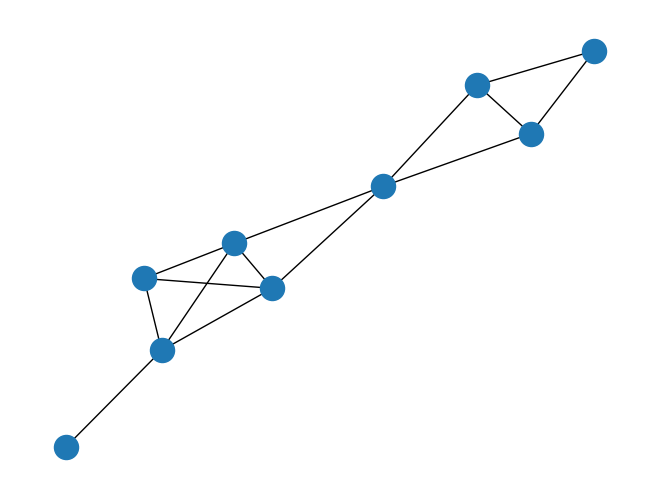

In [69]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
nx.draw(temp_Graph)

In [70]:
import numpy as np
import scipy as sp
import scipy.sparse 

def mypagerank(G,alpha=0.85, max_iter=100,tol=1.0e-6):
    
    N = len(G)
    nodelist = list(G)
    A = nx.to_scipy_sparse_array(G, nodelist=nodelist, dtype=float)
    S = A.sum(axis=1)
    S[S != 0] = 1.0 / S[S != 0]
    Q = sp.sparse.csr_array(sp.sparse.spdiags(S.T, 0, *A.shape))
    A = Q @ A
    # initial vector
    x = np.repeat(1.0 / N, N)
    p = np.repeat(1.0 / N, N)
    
    dangling_weights = p
    is_dangling = np.where(S == 0)[0]
    for _ in range(max_iter):
        xlast = x
        x = alpha * (x @ A + sum(x[is_dangling]) * dangling_weights) + (1 - alpha) * p
        #l1 norm
        err = np.absolute(x - xlast).sum()
        if err < N * tol:
            return dict(zip(nodelist, map(float, np.round(x,4))))

In [71]:
mypagerank(G)

{1: 0.0851,
 2: 0.0704,
 3: 0.0721,
 4: 0.0779,
 15: 0.0509,
 9: 0.0556,
 10: 0.057,
 5: 0.0491,
 8: 0.0548,
 11: 0.0301,
 12: 0.0593,
 6: 0.0604,
 17: 0.0562,
 16: 0.0533,
 7: 0.0559,
 14: 0.0587,
 13: 0.0533}

### 2.7.1/ Comparision

In [72]:
print("pagerank Centralities of the Graph: \n",mypagerank(G))
print("pagerank Centralities NetworkX: \n", nx.pagerank(G, weight='weight'))

pagerank Centralities of the Graph: 
 {1: 0.0851, 2: 0.0704, 3: 0.0721, 4: 0.0779, 15: 0.0509, 9: 0.0556, 10: 0.057, 5: 0.0491, 8: 0.0548, 11: 0.0301, 12: 0.0593, 6: 0.0604, 17: 0.0562, 16: 0.0533, 7: 0.0559, 14: 0.0587, 13: 0.0533}
pagerank Centralities NetworkX: 
 {1: 0.08510275171090052, 2: 0.07036723548249191, 3: 0.07210878220106506, 4: 0.07793068159840727, 15: 0.05086993441701706, 9: 0.055565198429846537, 10: 0.05703894111148803, 5: 0.04910224124242256, 8: 0.05483671362647849, 11: 0.030132480983098633, 12: 0.05929092165421931, 6: 0.06038211879945627, 17: 0.05616702153345073, 16: 0.05330205121583224, 7: 0.0558770073826599, 14: 0.05866910324143484, 13: 0.05325681536973059}
